# Billionaires data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch
import geopandas as gpd

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)
sns.set_style('darkgrid') 

# Step 2: Geographic analysis

Understand how wealth is distributed geographically.

Techniques:
Billionaire Concentration:
- Create a world map showing the number of billionaires per country (country).
- Heatmap for total wealth per country.

Regional Breakdown:
- Bar charts of billionaire counts by state or residenceStateRegion.

Correlation Analysis:
- Scatterplots for GDP_country vs. the number of billionaires in each country.
- Add trendlines to assess the relationship.

In [4]:
countries = gpd.read_file("./world-administrative-boundaries/world-administrative-boundaries.shp")

In [5]:
df_bill_str = pd.read_csv("./datasets/billionaires_string.csv")
df_bill_num = pd.read_csv("./datasets/billionaires_numeric.csv")
df_bill_num_cat = pd.read_csv("./datasets/billionaires_numeric_modified.csv")

## 2.1. Billionaire Concentration:

In [6]:
# Embed number of billionaires to each country
df_bill_num_cat['nBillionaires'] = df_bill_num_cat.groupby('country')['country'].transform('count')

In [7]:
df_bill_num_cat['nBillionaires'] = df_bill_num_cat['nBillionaires'].fillna(0).astype('int')

In [8]:
df_to_join_countries = df_bill_num_cat[['country', 'nBillionaires']].copy()
df_to_join_countries.dropna(inplace=True)
df_to_join_countries.drop_duplicates(inplace=True)

In [9]:
df_to_join_countries = df_to_join_countries.replace(
    {
        "United States" : "United States of America",
        "United Kingdom" : "U.K. of Great Britain and Northern Ireland",
        "Russia" : "Russian Federation"
    }
)

In [10]:
df_to_join_countries

,country,nBillionaires
0,France,35
1,United States of America,754
7,Mexico,13
8,India,157
12,Spain,25
...,...,...
1925,Tanzania,1
1966,Bahrain,1
1979,Peru,2
2002,Andorra,1


In [11]:
countries = pd.merge(left=countries, 
                     right=df_to_join_countries, 
                     left_on='name', 
                     right_on='country', 
                     how='left')

### Maps

### - Create a world map showing the number of billionaires per country (country).

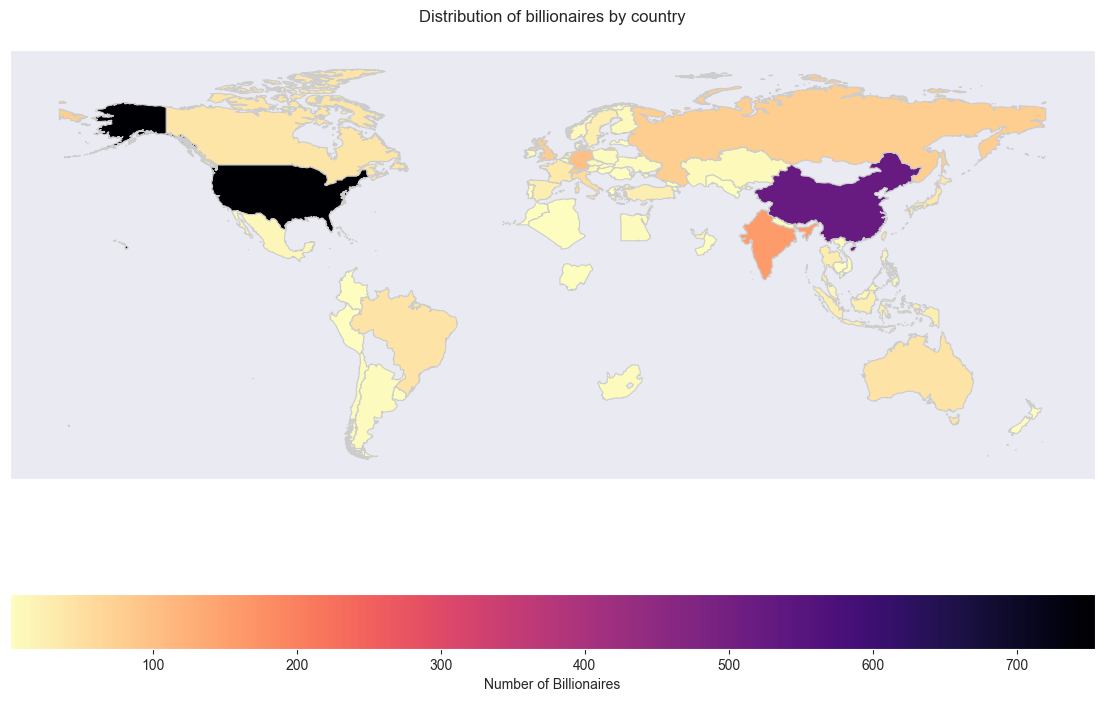

In [12]:
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw=dict(aspect='equal'))

'''
countries.plot(column='nBillionaires', 
               scheme='Quantiles', 
               k=10, 
               cmap='GnBu', 
               legend=True, ax=ax)
'''
# Customize the legend
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0.1, 0.5, 0.05, 0.1))

countries.plot(column='nBillionaires', 
                  cmap='magma_r', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "Number of Billionaires", 
                               "orientation": "horizontal"})

plt.title("Distribution of billionaires by country", pad=20)
plt.xticks([])
plt.yticks([])
plt.show()

### - Heatmap for total wealth per country.

In [14]:
# Get the top 10 countries by count
top_10_countries_num = df_bill_num_cat['country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10_num = df_bill_num_cat[df_bill_num_cat['country'].isin(top_10_countries_num)].copy()

In [15]:
df_top_10_num['country'].value_counts().reset_index()

,country,count
0,United States,754
1,China,523
2,India,157
3,Germany,102
4,United Kingdom,82
5,Russia,79
6,Switzerland,78
7,Hong Kong,68
8,Italy,55
9,Singapore,46


In [16]:
# Group data by country and calculate total wealth
wealth_by_country = df_bill_num_cat.groupby('country')['finalWorth'].sum().reset_index()
wealth_by_country.rename(columns={'finalWorth': 'totalWealth'}, inplace=True)

# Load world shapefile data using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the wealth data with world data based on country names
# Ensure consistent naming between the datasets
world_wealth = world.merge(wealth_by_country, how='left', left_on='name', right_on='country')

# Fill NaN values with 0 (countries with no billionaires)
world_wealth['totalWealth'] = world_wealth['totalWealth'].fillna(0)

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_5726/4241778199.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [17]:
df_bill_num_cat['totalWealth'] = df_bill_num_cat.groupby('country')['finalWorth'].transform('sum')
df_bill_num_cat['meanWealth'] = df_bill_num_cat.groupby('country')['finalWorth'].transform('mean')

In [18]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883


In [19]:
df_to_join_countries_second = df_bill_num_cat[['country', 'totalWealth', 'meanWealth', 'population_country', 'gdp_country']].copy()
df_to_join_countries_second.dropna(inplace=True)
df_to_join_countries_second.drop_duplicates(inplace=True)

In [20]:
df_to_join_countries_second.groupby('country')['totalWealth'].sum().reset_index().sort_values(by='totalWealth', ascending=False)

,country,totalWealth
74,United States,4575100.0
16,China,1805500.0
31,India,628700.0
24,France,499500.0
26,Germany,462100.0
...,...,...
75,Uruguay,1800.0
67,Tanzania,1500.0
1,Andorra,1500.0
7,Bahrain,1500.0


In [21]:
df_to_join_countries_second_replaced = df_to_join_countries_second.replace(
    {
        "United States" : "United States of America",
        "United Kingdom" : "U.K. of Great Britain and Northern Ireland",
        "Russia" : "Russian Federation"
    }
).copy()

In [22]:
df_to_join_countries_second_replaced.groupby('country')['totalWealth'].sum().reset_index().sort_values(by='totalWealth', ascending=False)

,country,totalWealth
74,United States of America,4575100.0
16,China,1805500.0
31,India,628700.0
24,France,499500.0
26,Germany,462100.0
...,...,...
75,Uruguay,1800.0
67,Tanzania,1500.0
1,Andorra,1500.0
7,Bahrain,1500.0


In [23]:
countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry,country,nBillionaires
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...",NaN,NaN
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205...",Uzbekistan,1.0
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...",Ireland,4.0
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...",NaN,NaN
4,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603...",NaN,NaN


In [24]:
countries = pd.merge(left=countries, 
                     right=df_to_join_countries_second_replaced, 
                     left_on='name', 
                     right_on='country', 
                     how='left')

In [25]:
countries.head(2)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry,country_x,nBillionaires,country_y,totalWealth,meanWealth,population_country,gdp_country
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205...",Uzbekistan,1.0,Uzbekistan,14400.0,14400.0,33580650.0,5.792129e+10


In [26]:
from matplotlib import colormaps

In [27]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [28]:
countries.head()

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry,country_x,nBillionaires,country_y,totalWealth,meanWealth,population_country,gdp_country
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205...",Uzbekistan,1.0,Uzbekistan,14400.0,14400.0,33580650.0,5.792129e+10
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...",Ireland,4.0,Ireland,9600.0,2400.0,0.0,0.000000e+00
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,Adm. by EGY,EGY,Ma'tan al-Sarra,Africa,Northern Africa,None,Ma'tan al-Sarra,"POLYGON ((33.25104 21.99977, 34.15064 21.99603...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


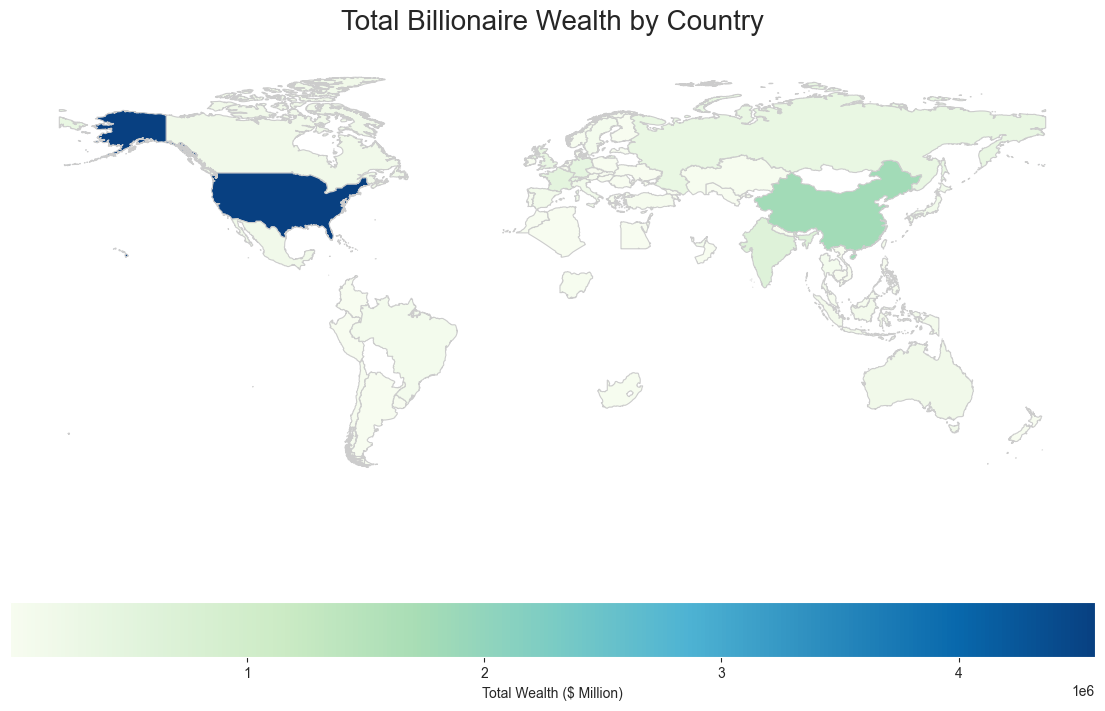

In [29]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
countries.plot(column='totalWealth', 
                  cmap='GnBu', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "Total Wealth ($ Million)", 
                               "orientation": "horizontal"})

# Add titles and labels
ax.set_title('Total Billionaire Wealth by Country', 
             fontdict={'fontsize': 20}, 
             loc='center',
             pad=20)

ax.set_axis_off()

# Show plot
plt.show()

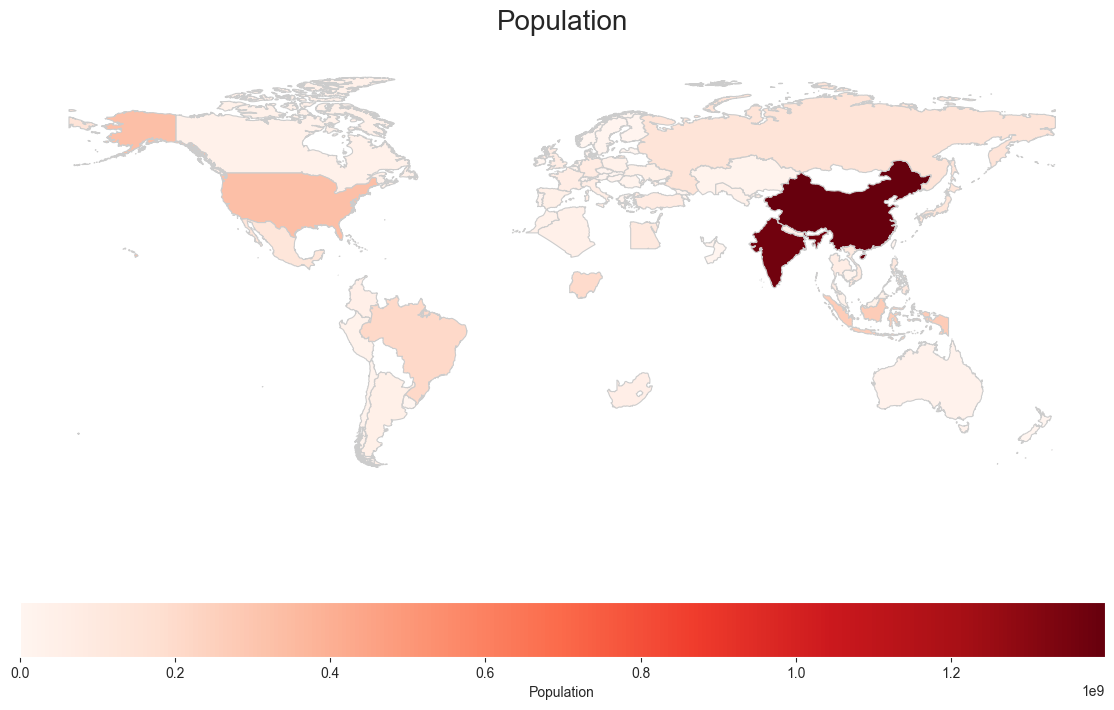

In [36]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
countries.plot(column='population_country', 
                  cmap='Reds', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "Population", 
                               "orientation": "horizontal"})

# Add titles and labels
ax.set_title('Population', 
             fontdict={'fontsize': 20}, 
             loc='center',
             pad=20)

ax.set_axis_off()

# Show plot
plt.show()

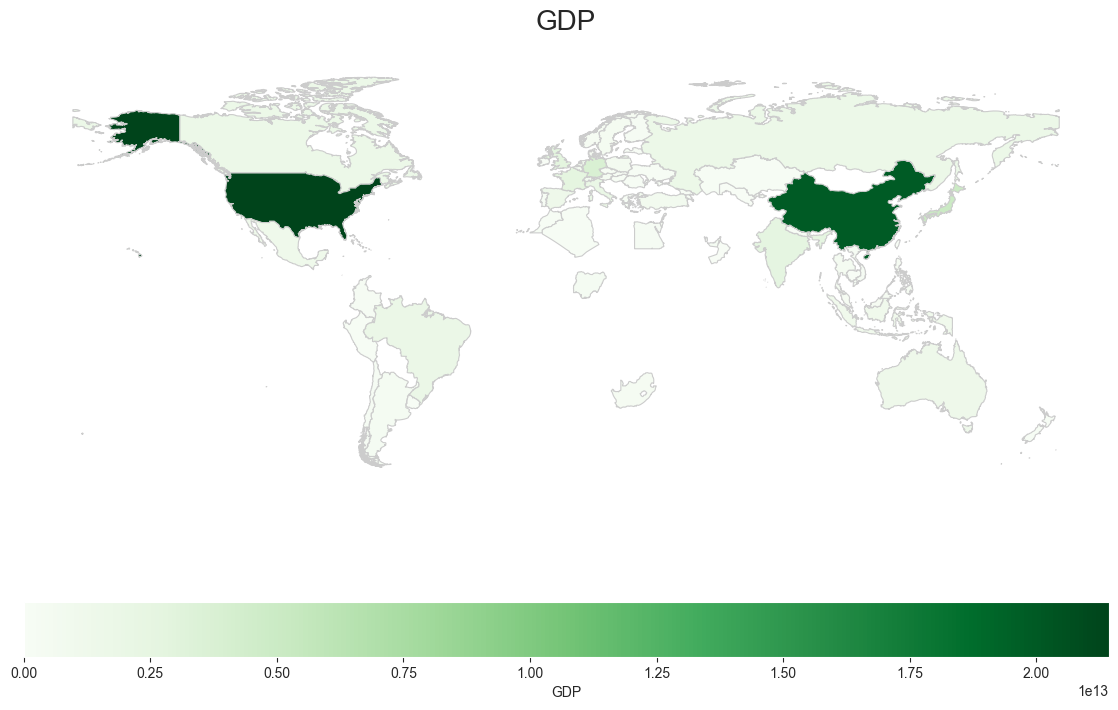

In [30]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
countries.plot(column='gdp_country', 
                  cmap='Greens', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "GDP", 
                               "orientation": "horizontal"})

# Add titles and labels
ax.set_title('GDP', 
             fontdict={'fontsize': 20}, 
             loc='center',
             pad=20)

ax.set_axis_off()

# Show plot
plt.show()

### United States

In [31]:
df_bill_str.head()

,category,personName,country,city,source,industries,countryOfCitizenship,organization,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,gdp_country
0,Fashion & Retail,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,U,M,1949-03-05 00:00:00,Arnault,Bernard,Chairman and CEO,2023-04-04 05:01:00,NaN,NaN,"$2,715,518,274,227"
1,Automotive,Elon Musk,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,D,M,1971-06-28 00:00:00,Musk,Elon,CEO,2023-04-04 05:01:00,Texas,South,"$21,427,700,000,000"
2,Technology,Jeff Bezos,United States,Medina,Amazon,Technology,United States,Amazon,D,M,1964-01-12 00:00:00,Bezos,Jeff,Chairman and Founder,2023-04-04 05:01:00,Washington,West,"$21,427,700,000,000"
3,Technology,Larry Ellison,United States,Lanai,Oracle,Technology,United States,Oracle,U,M,1944-08-17 00:00:00,Ellison,Larry,CTO and Founder,2023-04-04 05:01:00,Hawaii,West,"$21,427,700,000,000"
4,Finance & Investments,Warren Buffett,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),D,M,1930-08-30 00:00:00,Buffett,Warren,CEO,2023-04-04 05:01:00,Nebraska,Midwest,"$21,427,700,000,000"


In [32]:
df_bill_str_usa = df_bill_str[df_bill_str['country'] == 'United States'].copy()

In [33]:
df_bill_num_cat['state'] = df_bill_str['state'].copy()

In [34]:
df_bill_num_cat_usa = df_bill_num_cat[df_bill_num_cat['country'] == 'United States'].copy()

In [35]:
# Embed number of US billionaires to each state
df_bill_num_cat_usa['nBillionaires'] = df_bill_num_cat_usa.groupby('state')['state'].transform('count')

df_bill_num_cat_usa['nBillionaires'] = df_bill_num_cat_usa['nBillionaires'].fillna(0).astype('int')

In [36]:
df_bill_num_cat_usa.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Automotive,United States,M,70,4575100.0,6067.771883,Texas
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,13,4575100.0,6067.771883,Washington
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,2,4575100.0,6067.771883,Hawaii
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Finance & Investments,United States,M,3,4575100.0,6067.771883,Nebraska
5,6,104000,67,True,1955,10,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,13,4575100.0,6067.771883,Washington


In [37]:
df_bill_num_cat_usa.columns

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country', 'category', 'country', 'gender', 'nBillionaires',
       'totalWealth', 'meanWealth', 'state'],
      dtype='object')

In [38]:
df_bill_num_cat_usa['totalWealth'] = df_bill_num_cat_usa.groupby('state')['finalWorth'].transform('sum')
df_bill_num_cat_usa['meanWealth'] = df_bill_num_cat_usa.groupby('state')['finalWorth'].transform('mean')

In [39]:
df_bill_num_cat_usa.head(4)

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Automotive,United States,M,70,576500.0,8235.714286,Texas
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,13,350300.0,26946.153846,Washington
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,2,115800.0,57900.000000,Hawaii
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Finance & Investments,United States,M,3,109900.0,36633.333333,Nebraska


In [40]:
# Load US shapefile
shp_us_states = gpd.read_file("./tl_2023_us_state/tl_2023_us_state.shp")

In [41]:
pop_us_states = pd.read_csv("./datasets/NST-EST2023-ALLDATA.csv")

In [42]:
pop_us_states['NAME'].nunique()

66

In [43]:
shp_us_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [44]:
df_bill_num_cat_usa[['state', 'nBillionaires', 'totalWealth', 'meanWealth']]

,state,nBillionaires,totalWealth,meanWealth
1,Texas,70,576500.0,8235.714286
2,Washington,13,350300.0,26946.153846
3,Hawaii,2,115800.0,57900.000000
4,Nebraska,3,109900.0,36633.333333
5,Washington,13,350300.0,26946.153846
...,...,...,...,...
2611,Massachusetts,21,86400.0,4114.285714
2613,Florida,94,382200.0,4065.957447
2614,Utah,6,11600.0,1933.333333
2620,California,178,882800.0,4959.550562


In [45]:
df_to_join_us_state = df_bill_num_cat_usa[['state', 'nBillionaires', 'totalWealth', 'meanWealth']].copy()
df_to_join_us_state.dropna(inplace=True)
# df_to_join_us_state.drop_duplicates(inplace=True)

In [46]:
df_to_join_us_state.shape

(753, 4)

In [47]:
states_grouped = df_to_join_us_state.drop_duplicates()

In [48]:
states_grouped = states_grouped.reset_index()

In [49]:
states_grouped.rename(columns={'index' : 'origin_idx'}, inplace=True)

In [50]:
states_grouped

,origin_idx,state,nBillionaires,totalWealth,meanWealth
0,1,Texas,70,576500.0,8235.714286
1,2,Washington,13,350300.0,26946.153846
2,3,Hawaii,2,115800.0,57900.000000
3,4,Nebraska,3,109900.0,36633.333333
4,6,New York,128,731800.0,5717.187500
5,11,California,178,882800.0,4959.550562
6,16,Kansas,2,63200.0,31600.000000
7,18,Arkansas,6,128600.0,21433.333333
8,24,Oregon,3,49500.0,16500.000000
9,30,Virginia,8,63200.0,7900.000000


In [51]:
pop_us_states_to_merge = pop_us_states[['NAME', 'POPESTIMATE2023']].copy()

In [52]:
pop_us_states_to_merge.shape

(66, 2)

In [53]:
pop_us_states_to_merge.head()

,NAME,POPESTIMATE2023
0,United States,334914895
1,Northeast Region,56983517
2,New England,15159777
3,Middle Atlantic,41823740
4,Midwest Region,68909283


In [54]:
states_grouped.shape

(45, 5)

In [55]:
states_grouped_first = states_grouped.merge(pop_us_states_to_merge, left_on='state', right_on='NAME', how='left')

In [56]:
states_grouped_first.shape

(45, 7)

In [57]:
states_grouped_first.head()

,origin_idx,state,nBillionaires,totalWealth,meanWealth,NAME,POPESTIMATE2023
0,1,Texas,70,576500.0,8235.714286,Texas,30503301.0
1,2,Washington,13,350300.0,26946.153846,Washington,7812880.0
2,3,Hawaii,2,115800.0,57900.000000,Hawaii,1435138.0
3,4,Nebraska,3,109900.0,36633.333333,Nebraska,1978379.0
4,6,New York,128,731800.0,5717.187500,New York,19571216.0


In [58]:
pop_us_states.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,NPOPCHG_2020,NPOPCHG_2021,NPOPCHG_2022,NPOPCHG_2023,BIRTHS2020,BIRTHS2021,BIRTHS2022,BIRTHS2023,DEATHS2020,DEATHS2021,DEATHS2022,DEATHS2023,NATURALCHG2020,NATURALCHG2021,NATURALCHG2022,NATURALCHG2023,INTERNATIONALMIG2020,INTERNATIONALMIG2021,INTERNATIONALMIG2022,INTERNATIONALMIG2023,DOMESTICMIG2020,DOMESTICMIG2021,DOMESTICMIG2022,DOMESTICMIG2023,NETMIG2020,NETMIG2021,NETMIG2022,NETMIG2023,RESIDUAL2020,RESIDUAL2021,RESIDUAL2022,RESIDUAL2023,RBIRTH2021,RBIRTH2022,RBIRTH2023,RDEATH2021,RDEATH2022,RDEATH2023,RNATURALCHG2021,RNATURALCHG2022,RNATURALCHG2023,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023
0,10,0,0,0,United States,331464948,331526933,332048977,333271411,334914895,61985,522044,1222434,1643484,894123,3584459,3679254,3653356,852024,3438423,3456087,3148861,42099,146036,223167,504495,19886,376008,999267,1138989,0,0,0,0,19886,376008,999267,1138989,0,0,0,0,10.803463,11.060097,10.935142,10.363315,10.389241,9.425099,0.440149,0.670856,1.510043,1.133278,3.003867,3.409196,0.000000,0.000000,0.000000,1.133278,3.003867,3.409196
1,20,1,0,0,Northeast Region,57614141,57430477,57243423,57026847,56983517,-183664,-187054,-216576,-43330,146099,572860,588927,581516,193163,560547,563354,525863,-47064,12313,25573,55653,4432,80448,210145,225009,-131531,-276548,-450321,-323300,-127099,-196100,-240176,-98291,-9501,-3267,-1973,-692,9.991114,10.307615,10.201108,9.776366,9.860027,9.224828,0.214748,0.447588,0.976280,1.403074,3.678035,3.947167,-4.823207,-7.881683,-5.671414,-3.420133,-4.203648,-1.724247
2,30,1,1,0,New England,15119994,15057898,15106108,15120739,15159777,-62096,48210,14631,39038,35418,139200,144753,142522,46210,143827,149344,142818,-10792,-4627,-4591,-296,1562,26735,68504,76068,-46076,24369,-46644,-37031,-44514,51104,21860,39037,-6790,1733,-2638,297,9.229543,9.577777,9.413446,9.536333,9.881547,9.432996,-0.306789,-0.303770,-0.019551,1.772643,4.532659,5.024221,1.615767,-3.086263,-2.445863,3.388409,1.446396,2.578358
3,30,1,2,0,Middle Atlantic,42494147,42372579,42137315,41906108,41823740,-121568,-235264,-231207,-82368,110681,433660,444174,438994,146953,416720,414010,383045,-36272,16940,30164,55949,2870,53713,141641,148941,-85455,-300917,-403677,-286269,-82585,-247204,-262036,-137328,-2711,-5000,665,-989,10.262940,10.570107,10.485962,9.862041,9.852288,9.149545,0.400900,0.717819,1.336417,1.271165,3.370662,3.557656,-7.121462,-9.606391,-6.837920,-5.850297,-6.235729,-3.280264
4,20,2,0,0,Midwest Region,68987296,68969794,68850246,68783028,68909283,-17502,-119548,-67218,126255,190125,748083,753976,746365,186179,762461,771652,700527,3946,-14378,-17676,45838,3074,55313,144422,165910,-35580,-177584,-181443,-85729,-32506,-122271,-37021,80181,11058,17101,-12521,236,10.855939,10.956304,10.841056,11.064588,11.213161,10.175252,-0.208649,-0.256856,0.665803,0.802684,2.098649,2.409866,-2.577042,-2.636615,-1.245226,-1.774357,-0.537966,1.164640


In [59]:
states_grouped_first.drop(['origin_idx'], axis=1, inplace=True)

In [60]:
# load U.S. GDP by state data
us_state_gdp = pd.read_csv("./datasets/us_state_gdp.csv", sep=";")

In [61]:
us_state_gdp['State'] = us_state_gdp['State'].str.lstrip().str.rstrip()
states_grouped_first['state'] = states_grouped_first['state'].str.lstrip().str.rstrip()

In [62]:
states_grouped_first = states_grouped_first.merge(us_state_gdp, left_on='state', right_on='State', how='left')

In [63]:
states_grouped_first

,state,nBillionaires,totalWealth,meanWealth,NAME,POPESTIMATE2023,State,2022r,2023r,gdp_2023_q4
0,Texas,70,576500.0,8235.714286,Texas,30503301.0,Texas,2436925.0,2583866.0,2647608.0
1,Washington,13,350300.0,26946.153846,Washington,7812880.0,Washington,742909.0,807865.0,831911.0
2,Hawaii,2,115800.0,57900.000000,Hawaii,1435138.0,Hawaii,103153.0,110265.0,112302.0
3,Nebraska,3,109900.0,36633.333333,Nebraska,1978379.0,Nebraska,167480.0,181285.0,183226.0
4,New York,128,731800.0,5717.187500,New York,19571216.0,New York,2052759.0,2172010.0,2207141.0
5,California,178,882800.0,4959.550562,California,38965193.0,California,3660416.0,3870379.0,3936165.0
6,Kansas,2,63200.0,31600.000000,Kansas,2940546.0,Kansas,212612.0,228232.0,232076.0
7,Arkansas,6,128600.0,21433.333333,Arkansas,3067732.0,Arkansas,168606.0,178606.0,181277.0
8,Oregon,3,49500.0,16500.000000,Oregon,4233358.0,Oregon,298848.0,318884.0,323805.0
9,Virginia,8,63200.0,7900.000000,Virginia,8715698.0,Virginia,666682.0,719897.0,739546.0


In [64]:
states_grouped_first.drop(['State'], axis=1, inplace=True)

In [65]:
states_grouped_first

,state,nBillionaires,totalWealth,meanWealth,NAME,POPESTIMATE2023,2022r,2023r,gdp_2023_q4
0,Texas,70,576500.0,8235.714286,Texas,30503301.0,2436925.0,2583866.0,2647608.0
1,Washington,13,350300.0,26946.153846,Washington,7812880.0,742909.0,807865.0,831911.0
2,Hawaii,2,115800.0,57900.000000,Hawaii,1435138.0,103153.0,110265.0,112302.0
3,Nebraska,3,109900.0,36633.333333,Nebraska,1978379.0,167480.0,181285.0,183226.0
4,New York,128,731800.0,5717.187500,New York,19571216.0,2052759.0,2172010.0,2207141.0
5,California,178,882800.0,4959.550562,California,38965193.0,3660416.0,3870379.0,3936165.0
6,Kansas,2,63200.0,31600.000000,Kansas,2940546.0,212612.0,228232.0,232076.0
7,Arkansas,6,128600.0,21433.333333,Arkansas,3067732.0,168606.0,178606.0,181277.0
8,Oregon,3,49500.0,16500.000000,Oregon,4233358.0,298848.0,318884.0,323805.0
9,Virginia,8,63200.0,7900.000000,Virginia,8715698.0,666682.0,719897.0,739546.0


In [66]:
shp_us_states['NAME'] = shp_us_states['NAME'].str.lstrip().str.rstrip()
states_grouped_first['state'] = states_grouped_first['state'].str.lstrip().str.rstrip()

In [67]:
states_grouped_first.rename(columns={
    'totalWealth' : 'billTotalWealth',
    'meanWealth' : 'billMeanWealth'
}, inplace=True)

In [68]:
shp_us_states_economics = shp_us_states.merge(states_grouped_first, left_on='NAME', right_on='state', how='left')

In [69]:
shp_us_states_economics.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME_x,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,nBillionaires,billTotalWealth,billMeanWealth,NAME_y,POPESTIMATE2023,2022r,2023r,gdp_2023_q4
0,3,5,54,01779805,54,0400000US54,WV,West Virginia,00,G4000,A,62266499712,489003081,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,5,12,00294478,12,0400000US12,FL,Florida,00,G4000,A,138963763779,45970528648,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",Florida,94.0,382200.0,4065.957447,Florida,22610726.0,1465281.0,1600811.0,1642249.0
2,2,3,17,01779784,17,0400000US17,IL,Illinois,00,G4000,A,143778366814,6216688589,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",Illinois,24.0,102500.0,4270.833333,Illinois,12549689.0,1040353.0,1098346.0,1114360.0
3,2,4,27,00662849,27,0400000US27,MN,Minnesota,00,G4000,A,206244555303,18937471947,+46.3159573,-094.1996043,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",Minnesota,5.0,7900.0,1580.000000,Minnesota,5737915.0,454993.0,483162.0,492823.0
4,3,5,24,01714934,24,0400000US24,MD,Maryland,00,G4000,A,25151736098,6979330958,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",Maryland,10.0,34700.0,3470.000000,Maryland,6180253.0,484908.0,515607.0,525753.0


In [70]:
print(f"USA states shp shape: {shp_us_states.shape}")
print(f"USA states economics shp shape: {shp_us_states_economics.shape}")

USA states shp shape: (56, 16)
USA states economics shp shape: (56, 25)


In [71]:
shp_us_states_economics.loc[shp_us_states_economics['NAME_y'] == 'Hawaii']

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME_x,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state,nBillionaires,billTotalWealth,billMeanWealth,NAME_y,POPESTIMATE2023,2022r,2023r,gdp_2023_q4
31,4,9,15,01779782,15,0400000US15,HI,Hawaii,00,G4000,A,16634423916,11777375352,+19.8281671,-155.4950421,"MULTIPOLYGON (((-164.76481 23.58172, -164.7634...",Hawaii,2.0,115800.0,57900.0,Hawaii,1435138.0,103153.0,110265.0,112302.0


In [72]:
shp_us_states_econ_no_hawaii = shp_us_states_economics.drop(shp_us_states_economics.loc[shp_us_states_economics['NAME_y'] == 'Hawaii'].index).copy()

In [73]:
shp_us_states_econ_no_hawaii.shape

(55, 25)

In [74]:
shp_us_states_econ_no_hawaii.drop('NAME_y', axis=1, inplace=True)

### U.S. Billionaires by state

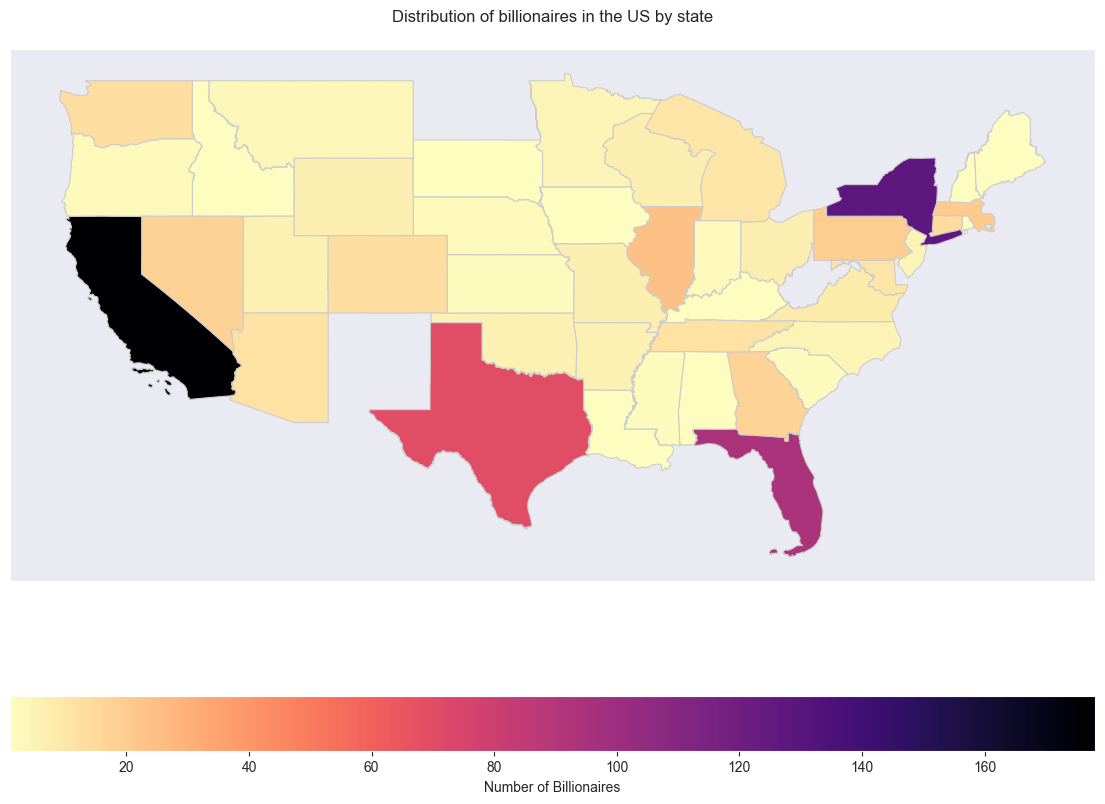

In [75]:
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw=dict(aspect='equal'))

shp_us_states_econ_no_hawaii.plot(column='nBillionaires', 
                                    cmap='magma_r', 
                                    linewidth=0.8, 
                                    ax=ax, 
                                    edgecolor='0.8', 
                                    legend=True,
                                    legend_kwds={"label": "Number of Billionaires", 
                                                "orientation": "horizontal"})

plt.title("Distribution of billionaires in the US by state", pad=20)
plt.xticks([])
plt.yticks([])
plt.show()

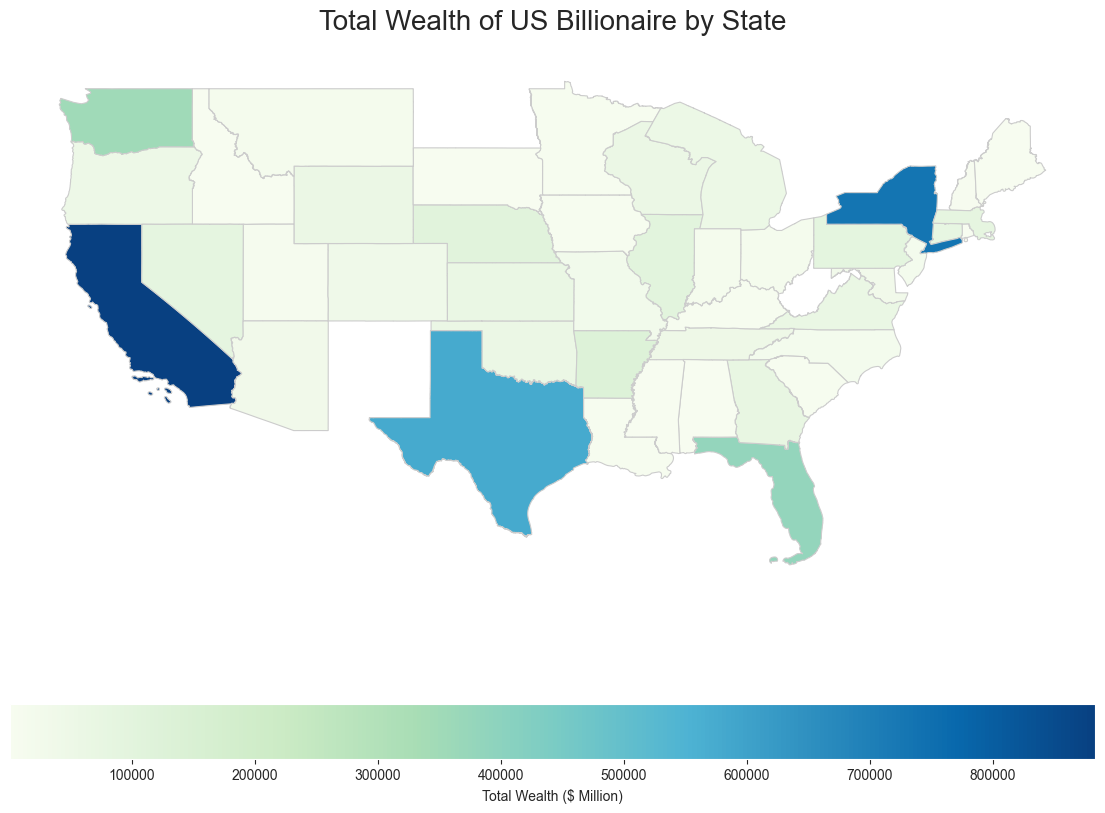

In [76]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 10), subplot_kw=dict(aspect='equal'))
shp_us_states_econ_no_hawaii.plot(column='billTotalWealth', 
                  cmap='GnBu', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "Total Wealth ($ Million)", 
                               "orientation": "horizontal"})

# Add titles and labels
ax.set_title('Total Wealth of US Billionaire by State', 
             fontdict={'fontsize': 20}, 
             loc='center',
             pad=20)

ax.set_axis_off()

# Show plot
plt.show()

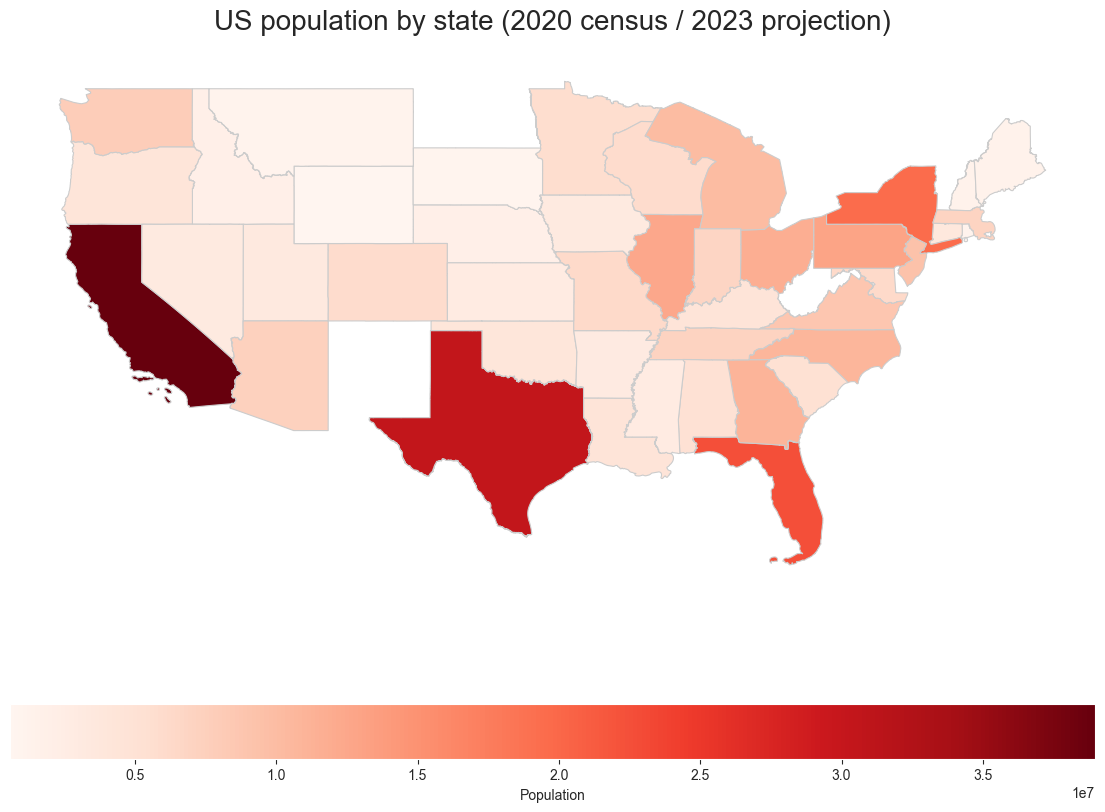

In [77]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
shp_us_states_econ_no_hawaii.plot(column='POPESTIMATE2023', 
                  cmap='Reds', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "Population", 
                               "orientation": "horizontal"})

# Add titles and labels
ax.set_title('US population by state (2020 census / 2023 projection)', 
             fontdict={'fontsize': 20}, 
             loc='center',
             pad=20)

ax.set_axis_off()

# Show plot
plt.show()

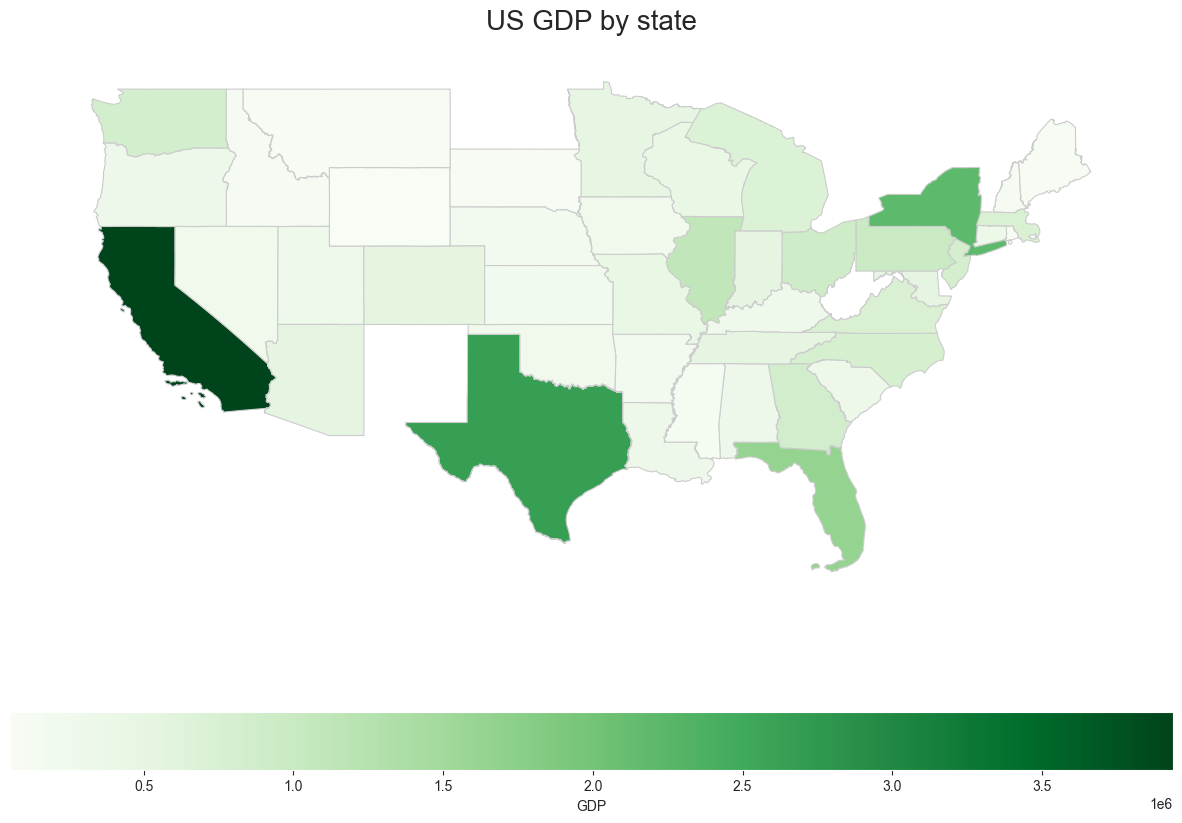

In [78]:
# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
shp_us_states_econ_no_hawaii.plot(column='gdp_2023_q4', 
                  cmap='Greens', 
                  linewidth=0.8, 
                  ax=ax, 
                  edgecolor='0.8', 
                  legend=True,
                  legend_kwds={"label": "GDP", 
                               "orientation": "horizontal"})

# Add titles and labels
ax.set_title('US GDP by state', 
             fontdict={'fontsize': 20}, 
             loc='center',
             pad=20)

ax.set_axis_off()

# Show plot
plt.show()

### Charts

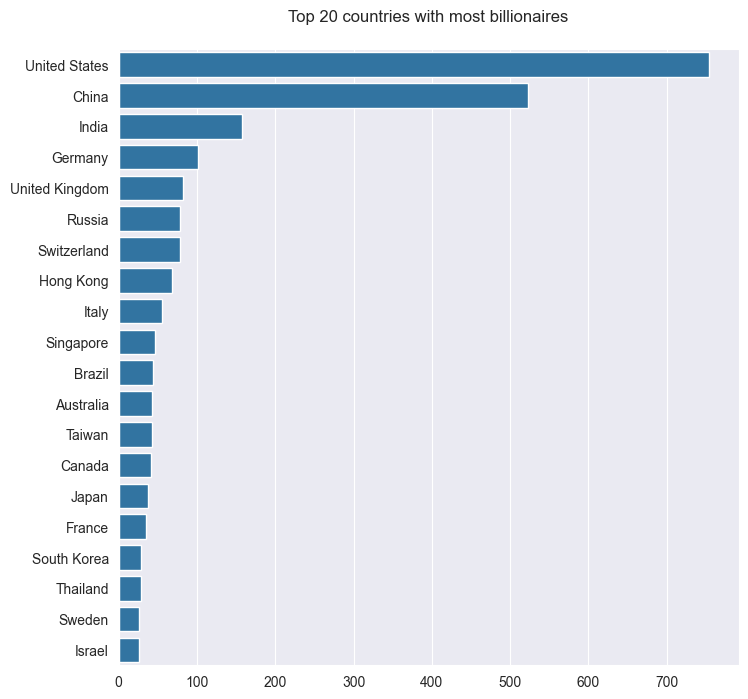

In [79]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str, y=df_bill_str['country'].value_counts().reset_index()['country'].head(20), 
            x=df_bill_str['country'].value_counts().reset_index()['count'])
plt.title("Top 20 countries with most billionaires", pad=20)
plt.xticks(rotation=0)
plt.ylabel(None)
plt.xlabel(None, labelpad=10)
plt.show()

In [94]:
df_bill_str_usa = df_bill_str[df_bill_str['country'] == 'United States'].copy()

In [100]:
df_bill_str_usa.sample(10)

,category,personName,country,city,source,industries,countryOfCitizenship,organization,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,gdp_country
938,Finance & Investments,Warren Stephens,United States,Little Rock,Investment banking,Finance & Investments,United States,NaN,U,M,1957-02-18 00:00:00,Stephens,Warren,NaN,2023-04-04 05:01:00,Arkansas,South,"$21,427,700,000,000"
1208,Energy,Michael S. Smith,United States,Miami Beach,Liquefied natural gas,Energy,United States,NaN,U,M,1955-05-09 00:00:00,Smith,Michael S.,Investor,2023-04-04 05:01:00,Florida,South,"$21,427,700,000,000"
2322,Technology,Frederic Luddy,United States,San Diego,Software,Technology,United States,ServiceNow,D,M,1954-11-24 00:00:00,Luddy,Frederic,Founder and Chief Product Officer,2023-04-04 05:01:00,California,West,"$21,427,700,000,000"
1368,Finance & Investments,Brian Armstrong,United States,San Francisco,Cryptocurrency,Finance & Investments,United States,NaN,D,M,1983-01-25 00:00:00,Armstrong,Brian,NaN,2023-04-04 05:01:00,California,West,"$21,427,700,000,000"
580,Sports,Gayle Benson,United States,New Orleans,New Orleans Saints,Sports,United States,NaN,U,F,1947-01-26 00:00:00,Benson,Gayle,NaN,2023-04-04 05:01:00,Louisiana,South,"$21,427,700,000,000"
2132,Automotive,A. Jayson Adair,United States,Dallas,Damaged cars,Automotive,United States,NaN,U,M,1969-10-16 00:00:00,Adair,A. Jayson,NaN,2023-04-04 05:01:00,Texas,South,"$21,427,700,000,000"
2284,Manufacturing,Farhad Ebrahimi,United States,Denver,Solar panels,Manufacturing,United States,NaN,N,M,1939-01-01 00:00:00,Ebrahimi,Farhad,NaN,2023-04-04 05:01:00,Colorado,West,"$21,427,700,000,000"
1115,Finance & Investments,Glenn Dubin,United States,New York,Hedge funds,Finance & Investments,United States,NaN,U,M,1957-04-13 00:00:00,Dubin,Glenn,NaN,2023-04-04 05:01:00,New York,Northeast,"$21,427,700,000,000"
360,Finance & Investments,David Siegel,United States,Scarsdale,Hedge funds,Finance & Investments,United States,Two Sigma,U,M,1961-07-15 00:00:00,Siegel,David,Investor,2023-04-04 05:01:00,New York,Northeast,"$21,427,700,000,000"
524,Finance & Investments,Charles B. Johnson,United States,Palm Beach,Franklin Templeton,Finance & Investments,United States,Franklin Resources Inc.,E,M,1933-01-06 00:00:00,Johnson,Charles B.,Former Chairman and CEO,2023-04-04 05:01:00,Florida,South,"$21,427,700,000,000"


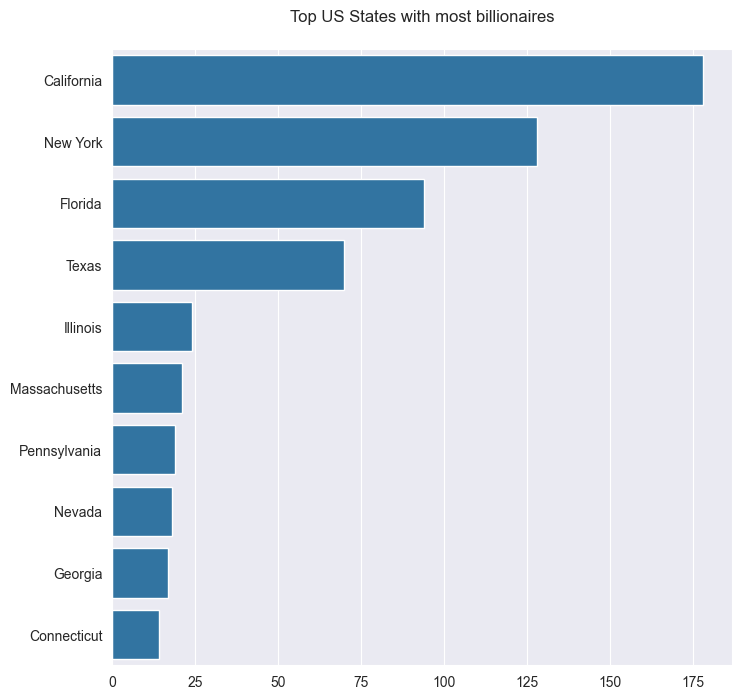

In [80]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str_usa, y=df_bill_str_usa['state'].value_counts().reset_index()['state'].head(10), 
            x=df_bill_str_usa['state'].value_counts().reset_index()['count'])
plt.xticks(rotation=None)
plt.title('Top US States with most billionaires', pad=20)
plt.ylabel(None)
plt.xlabel(None, labelpad=10)
plt.show()

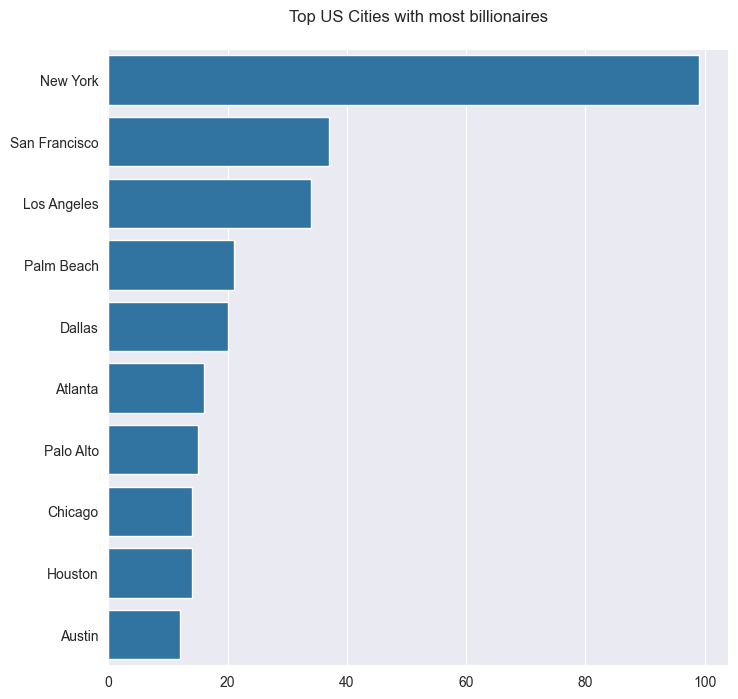

In [108]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_bill_str_usa, y=df_bill_str_usa['city'].value_counts().reset_index()['city'].head(10), 
            x=df_bill_str_usa['city'].value_counts().reset_index()['count'])
plt.xticks(rotation=None)
plt.title('Top US Cities with most billionaires', pad=20)
plt.ylabel(None)
plt.xlabel(None, labelpad=10)
plt.show()

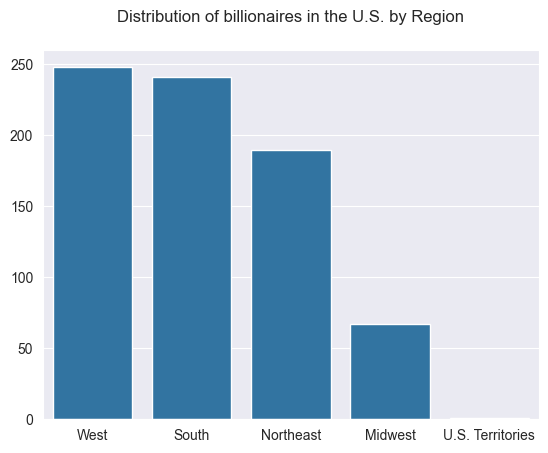

In [83]:
#plt.figure(figsize=(20, 8))
sns.barplot(data=df_bill_str_usa, x=df_bill_str_usa['residenceStateRegion'].value_counts().reset_index()['residenceStateRegion'], 
            y=df_bill_str_usa['residenceStateRegion'].value_counts().reset_index()['count'])
plt.xticks(rotation=None)
plt.title('Distribution of billionaires in the U.S. by Region', pad=20)
plt.xlabel(None, labelpad=10)
plt.ylabel(None, labelpad=None)
plt.show()

In [98]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska


In [99]:
df_bill_num_cat_usa.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Automotive,United States,M,70,576500.0,8235.714286,Texas
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,13,350300.0,26946.153846,Washington
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,2,115800.0,57900.000000,Hawaii
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Finance & Investments,United States,M,3,109900.0,36633.333333,Nebraska
5,6,104000,67,True,1955,10,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,13,350300.0,26946.153846,Washington


In [102]:
df_to_join_countries

,country,nBillionaires
0,France,35
1,United States of America,754
7,Mexico,13
8,India,157
12,Spain,25
...,...,...
1925,Tanzania,1
1966,Bahrain,1
1979,Peru,2
2002,Andorra,1


In [107]:
df_to_join_countries_second = df_to_join_countries_second.merge(df_to_join_countries, left_on='country', right_on='country', how='left')

In [112]:
df_to_join_countries_second

,country,totalWealth,meanWealth,population_country,gdp_country,nBillionaires
0,France,499500.0,14271.428571,67059887,2715518274227,35.0
1,United States,4575100.0,6067.771883,328239523,21427700000000,NaN
2,Mexico,165700.0,12746.153846,126014024,1258286717125,13.0
3,India,628700.0,4004.458599,1366417754,2611000000000,157.0
4,Spain,133700.0,5348.000000,47076781,1394116310769,25.0
...,...,...,...,...,...,...
73,Tanzania,1500.0,1500.000000,58005463,63177068175,1.0
74,Bahrain,1500.0,1500.000000,1501635,38574069149,1.0
75,Peru,2500.0,1250.000000,32510453,226848050820,2.0
76,Andorra,1500.0,1500.000000,77142,3154057987,1.0


In [113]:
df_to_join_countries_second_replaced = df_to_join_countries_second_replaced.merge(df_to_join_countries, left_on='country', right_on='country', how='left')

In [115]:
df_to_join_countries_second_replaced

,country,totalWealth,meanWealth,population_country,gdp_country,nBillionaires
0,France,499500.0,14271.428571,67059887,2715518274227,35
1,United States of America,4575100.0,6067.771883,328239523,21427700000000,754
2,Mexico,165700.0,12746.153846,126014024,1258286717125,13
3,India,628700.0,4004.458599,1366417754,2611000000000,157
4,Spain,133700.0,5348.000000,47076781,1394116310769,25
...,...,...,...,...,...,...
73,Tanzania,1500.0,1500.000000,58005463,63177068175,1
74,Bahrain,1500.0,1500.000000,1501635,38574069149,1
75,Peru,2500.0,1250.000000,32510453,226848050820,2
76,Andorra,1500.0,1500.000000,77142,3154057987,1


In [104]:
df_top_10_num

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Automotive,United States,M,754
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Finance & Investments,United States,M,754
5,6,104000,67,True,1955,10,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2540,1000,63,True,1959,5,1,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1397715000,35.86166,104.195397,19910000000000,Healthcare,China,M,523
2635,2540,1000,51,True,1971,12,14,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1397715000,35.86166,104.195397,19910000000000,Healthcare,China,M,523
2636,2540,1000,80,False,1943,3,10,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Food & Beverage,United States,M,754
2637,2540,1000,60,True,1962,12,18,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1397715000,35.86166,104.195397,19910000000000,Manufacturing,China,M,523


In [105]:
states_grouped_first

,state,nBillionaires,billTotalWealth,billMeanWealth,NAME,POPESTIMATE2023,2022r,2023r,gdp_2023_q4
0,Texas,70,576500.0,8235.714286,Texas,30503301.0,2436925.0,2583866.0,2647608.0
1,Washington,13,350300.0,26946.153846,Washington,7812880.0,742909.0,807865.0,831911.0
2,Hawaii,2,115800.0,57900.000000,Hawaii,1435138.0,103153.0,110265.0,112302.0
3,Nebraska,3,109900.0,36633.333333,Nebraska,1978379.0,167480.0,181285.0,183226.0
4,New York,128,731800.0,5717.187500,New York,19571216.0,2052759.0,2172010.0,2207141.0
5,California,178,882800.0,4959.550562,California,38965193.0,3660416.0,3870379.0,3936165.0
6,Kansas,2,63200.0,31600.000000,Kansas,2940546.0,212612.0,228232.0,232076.0
7,Arkansas,6,128600.0,21433.333333,Arkansas,3067732.0,168606.0,178606.0,181277.0
8,Oregon,3,49500.0,16500.000000,Oregon,4233358.0,298848.0,318884.0,323805.0
9,Virginia,8,63200.0,7900.000000,Virginia,8715698.0,666682.0,719897.0,739546.0


In [117]:
df_bill_num_cat

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,51,True,1971,12,14,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,19910000000000,Healthcare,China,M,523,1805500.0,3452.198853,NaN
2636,2540,1000,80,False,1943,3,10,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Food & Beverage,United States,M,754,4575100.0,6067.771883,Pennsylvania
2637,2540,1000,60,True,1962,12,18,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,19910000000000,Manufacturing,China,M,523,1805500.0,3452.198853,NaN
2638,2540,1000,71,True,1951,8,21,125.08,2.9,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,19910000000000,Real Estate,China,M,523,1805500.0,3452.198853,NaN


In [ ]:
states_grouped_first.to_csv("./datasets/us_billionaires_by_state.csv", index=False)
df_to_join_countries_second_replaced.to_csv("./datasets/billionaires_by_country.csv", index=False)
df_bill_num_cat.to_csv("./datasets/billionaires_numeric_modified_2.csv", index=False)